In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec


In [3]:
df=pd.read_csv('Desktop/pdf.csv')

In [4]:
df.head()

,overs,Batting Team,Batsman on strike,Batsman on non-strike,Bowler,runs scored,extras,out type,wides
0,0.1,Delhi Daredevils,G Gambhir,V Sehwag,MM Patel,0,0,NaN,NaN
1,0.2,Delhi Daredevils,G Gambhir,V Sehwag,MM Patel,0,0,NaN,NaN
2,0.3,Delhi Daredevils,G Gambhir,V Sehwag,MM Patel,0,0,NaN,NaN
3,0.4,Delhi Daredevils,G Gambhir,V Sehwag,MM Patel,0,0,NaN,NaN
4,0.5,Delhi Daredevils,G Gambhir,V Sehwag,MM Patel,4,0,NaN,NaN


In [5]:
df.describe()

,overs,runs scored,extras
count,97.000000,97.000000,97.000000
mean,7.513402,1.257732,0.103093
std,4.405291,1.515739,0.549328
min,0.100000,0.000000,0.000000
25%,3.600000,0.000000,0.000000
50%,7.500000,1.000000,0.000000
75%,11.300000,1.000000,0.000000
max,15.100000,6.000000,5.000000


## Total Runs Scored by DD

In [6]:
total_runs= df['runs scored'].sum()+ df['extras'].sum()

In [7]:
total_runs

132

In [8]:
y=df.groupby('Batsman on strike').count()

In [9]:
y

,overs,Batting Team,Batsman on non-strike,Bowler,runs scored,extras,out type,wides
Batsman on strike,,,,,,,,
G Gambhir,49,49,49,49,49,49,0,3
S Dhawan,44,44,44,44,44,44,0,3
V Sehwag,4,4,4,4,4,4,1,0


As only one player gets out the final score is 132-1

**Let's find out the total number of balls faced by a Batsman**

In [10]:
y['balls faced'] = y['overs'] - y['wides']

In [11]:
y

,overs,Batting Team,Batsman on non-strike,Bowler,runs scored,extras,out type,wides,balls faced
Batsman on strike,,,,,,,,,
G Gambhir,49,49,49,49,49,49,0,3,46
S Dhawan,44,44,44,44,44,44,0,3,41
V Sehwag,4,4,4,4,4,4,1,0,4


In [12]:
x= df.groupby('Batsman on strike').sum()

In [13]:
x

,overs,runs scored,extras
Batsman on strike,,,
G Gambhir,356.6,58,3
S Dhawan,367.2,52,7
V Sehwag,5.0,12,0


In [16]:
x['balls faced'] = y['balls faced']
x['Strike rate'] =  (x['runs scored']/x['balls faced'])* 100

In [17]:
x

,overs,runs scored,extras,balls faced,Strike rate
Batsman on strike,,,,,
G Gambhir,356.6,58,3,46,126.086957
S Dhawan,367.2,52,7,41,126.829268
V Sehwag,5.0,12,0,4,300.000000


In [18]:
batsmans = x.drop(['overs', 'extras'], axis=1)

In [19]:
batsmans

,runs scored,balls faced,Strike rate
Batsman on strike,,,
G Gambhir,58,46,126.086957
S Dhawan,52,41,126.829268
V Sehwag,12,4,300.000000


**Now let's find out the number of 4s and 6s scored by any player**

In [20]:
df.groupby('runs scored').count()
#As we can see there are total 3 sixes and 14 fours as runs scored==6 has appeared 3 times 
#and similarly runs scored==4 has appeared 14  times

,overs,Batting Team,Batsman on strike,Batsman on non-strike,Bowler,extras,out type,wides
runs scored,,,,,,,,
0,37,37,37,37,37,37,1,6
1,38,38,38,38,38,38,0,0
2,3,3,3,3,3,3,0,0
4,18,18,18,18,18,18,0,0
6,1,1,1,1,1,1,0,0


In [21]:
sixes= pd.DataFrame(df['Batsman on strike'][df['runs scored'] ==6])
sixes['count']= sixes['Batsman on strike'].index
s= sixes.groupby('Batsman on strike').count()
batsmans['6s']= s['count']

In [22]:
#Similarly for 4s
fours= pd.DataFrame(df['Batsman on strike'][df['runs scored'] ==4])
fours['count']= fours['Batsman on strike'].index
s= fours.groupby('Batsman on strike').count()
batsmans['4s']= s['count']

In [23]:
batsmans

,runs scored,balls faced,Strike rate,6s,4s
Batsman on strike,,,,,
G Gambhir,58,46,126.086957,1.0,7
S Dhawan,52,41,126.829268,NaN,8
V Sehwag,12,4,300.000000,NaN,3


In [25]:
#Now we will put 0 in place on Null values and will arrange the order of the columns
batsmans= batsmans.fillna(0)
RR_batting= batsmans.copy()
RR_batting = RR_batting[['runs scored', 'balls faced', '4s', '6s', 'Strike rate']]

## RR Batting Scorecard

In [26]:
RR_batting

,runs scored,balls faced,4s,6s,Strike rate
Batsman on strike,,,,,
G Gambhir,58,46,7,1.0,126.086957
S Dhawan,52,41,8,0.0,126.829268
V Sehwag,12,4,3,0.0,300.000000


**Now we will analyze the performance of the bowlers**

In [35]:
b3= df.groupby('Bowler').sum()
b3

,overs,runs scored,extras
Bowler,,,
D Salunkhe,86.8,6,5
MM Patel,42.3,25,0
SK Trivedi,190.4,29,3
SK Warne,112.2,16,0
SR Watson,148.1,30,1
YK Pathan,149.0,16,1


In [36]:
a5=df.groupby('Bowler').count()
a5

,overs,Batting Team,Batsman on strike,Batsman on non-strike,runs scored,extras,out type,wides
Bowler,,,,,,,,
D Salunkhe,7,7,7,7,7,7,0,1
MM Patel,18,18,18,18,18,18,0,0
SK Trivedi,21,21,21,21,21,21,0,3
SK Warne,12,12,12,12,12,12,0,0
SR Watson,25,25,25,25,25,25,1,1
YK Pathan,14,14,14,14,14,14,0,1


In [37]:
a5['overs']= (a5['overs']-a5['wides'])/6
a5

,overs,Batting Team,Batsman on strike,Batsman on non-strike,runs scored,extras,out type,wides
Bowler,,,,,,,,
D Salunkhe,1.000000,7,7,7,7,7,0,1
MM Patel,3.000000,18,18,18,18,18,0,0
SK Trivedi,3.000000,21,21,21,21,21,0,3
SK Warne,2.000000,12,12,12,12,12,0,0
SR Watson,4.000000,25,25,25,25,25,1,1
YK Pathan,2.166667,14,14,14,14,14,0,1


In [38]:
b3= b3.drop(['overs'], axis= 1)
b3['runs given'] = b3['runs scored']+ b3['extras']  # finding total runs obtained in the over that'll will be runs scored + wides/noballs
b3= b3.drop(['runs scored','extras'], axis= 1)
b3['overs']= a5['overs']
b3['wickets']= a5['out type']  #count of out type will give us the no of time bowler has got wicket
b3['Economy']= b3['runs given']/ 4  # economy will be avg runs given in an over
b3= b3[['overs','runs given','wickets', 'Economy']] # adjusting column sequence

## Bowling Performance

In [39]:
b3

,overs,runs given,wickets,Economy
Bowler,,,,
D Salunkhe,1.000000,11,0,2.75
MM Patel,3.000000,25,0,6.25
SK Trivedi,3.000000,32,0,8.00
SK Warne,2.000000,16,0,4.00
SR Watson,4.000000,31,1,7.75
YK Pathan,2.166667,17,0,4.25


## Visualizing 1st Innings and gaining insights

**Distribution of runs scored**

In [41]:
df['total runs'] = df['runs scored'] + df['extras']
df1=df.groupby('total runs').count()
df1

,overs,Batting Team,Batsman on strike,Batsman on non-strike,Bowler,runs scored,extras,out type,wides
total runs,,,,,,,,,
0,31,31,31,31,31,31,31,1,0
1,43,43,43,43,43,43,43,0,5
2,3,3,3,3,3,3,3,0,0
4,18,18,18,18,18,18,18,0,0
5,1,1,1,1,1,1,1,0,1
6,1,1,1,1,1,1,1,0,0


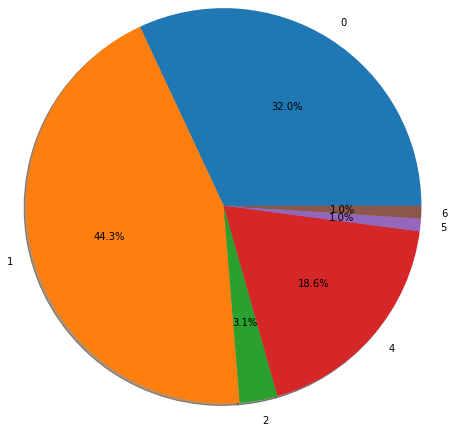

In [43]:
plt.figure(1, figsize=(20,10))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('Spectral')


plt.title('Runs Distribution')
plt.subplot(the_grid[0, 1], aspect=1)

source_pie = plt.pie(df1['overs'], labels=['0','1','2','4','5','6'], autopct='%1.1f%%', shadow=True,radius=2)


plt.show()

They obtained most of their runs by taking singles and turns out to be a good idea as they needed around 6 runs per over so taking singles will not be a bad idea at all.

**Analyzing Run rate scenerio**

In [44]:
runs={}
for i in range(1,21):
    
    a1=df['overs'] < i
    a2=df['overs'] > i-1
    
    a3=df[a1 & a2]
    
    runs[i]= a3['total runs'].sum()
    

In [45]:
runs
#it's a dictionary and we will convert it into a DataFrame

{1: 8,
 2: 13,
 3: 5,
 4: 10,
 5: 12,
 6: 7,
 7: 4,
 8: 12,
 9: 7,
 10: 8,
 11: 9,
 12: 5,
 13: 11,
 14: 4,
 15: 13,
 16: 4,
 17: 0,
 18: 0,
 19: 0,
 20: 0}

In [46]:
rpo=pd.DataFrame([runs])
rpo1= rpo.T

In [47]:
rpo1.columns=['Runs']
rpo1['over']= rpo1.index
rpo1.head()

,Runs,over
1,8,1
2,13,2
3,5,3
4,10,4
5,12,5


In [48]:
rpo1= rpo1[['over','Runs']]

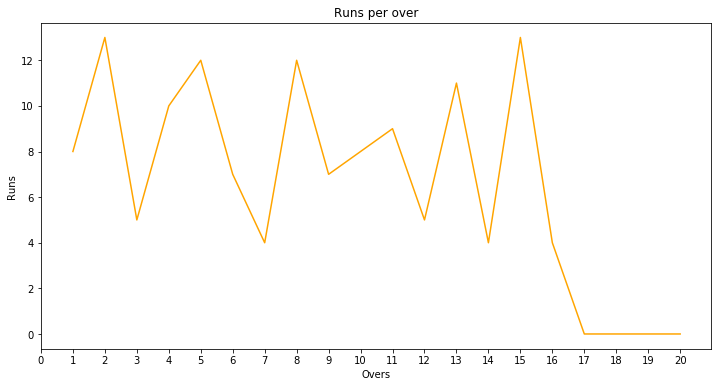

In [49]:
plt.figure(figsize=(12,6))
plt.plot(rpo1['over'],rpo1['Runs'],color='orange')
plt.xticks(np.arange(21))
plt.xlabel('Overs')
plt.ylabel('Runs')
plt.title('Runs per over')
plt.show()

As we can see DD were always in front of RR as they dominate themselves on the field by maintaining run rate greater than 6 runs per over for the first 6 overs. 

After that 1 wicket falls down but they keep pushing the pace and the game is ended in 16th over.

## Final Results

**DD beats RR by 9 wickets**
**Man of the Match if MF Maharoof for his 2 wickets in 4 overs by giving only 14 runs**